# Hello, FABRIC: Create your first FABRIC slice

## Configure the Environment

Set the environment variable that will be used by this notebook. If you are using the FABRIC, JupyterHub some of the environment will be automatically configured for you.  You will only need to set your bastion username, upload your bastion private key, and set the path to where you put your bastion private key. Your bastion username and private key should already be in your possession.  If you do not have a bastion username and private key, please contact the FABRIC admins using the [FABRIC User Forum](https://learn.fabric-testbed.net/forums/) 

If you are using the FABRIC API outside of the JupyterHub you will need to configure all of the environment variables. Defaults below will be correct in many situations but you will need to confirm your configuration.  If you have questions about this configuration, please contact the FABRIC admins using the [FABRIC User Forum](https://learn.fabric-testbed.net/forums/) 

More information about accessing your experiments through the FABRIC bastion hosts can be found [here](https://learn.fabric-testbed.net/knowledge-base/logging-into-fabric-vms/).

In [1]:
import os

# If you are using the FABRIC JupyterHub, the following three evnrionment vars
# were automatically provided when you logged in.
#os.environ['FABRIC_CREDMGR_HOST']='cm.fabric-testbed.net'
#os.environ['FABRIC_ORCHESTRATOR_HOST']='orchestrator.fabric-testbed.net'
#os.environ['FABRIC_TOKEN_LOCATION']=os.environ['HOME']+'/work/fabric_token_beta.json'

# Bastion IPs
os.environ['FABRIC_BASTION_HOST'] = 'bastion-1.fabric-testbed.net'

# Set your Bastion username and private key
os.environ['FABRIC_BASTION_USERNAME']='pruth_0031379841'
os.environ['FABRIC_BASTION_KEY_LOCATION']=os.environ['HOME']+'/FABRIC/pruth-bastion-1'

# Set the keypair FABRIC will install in your slice. 
os.environ['FABRIC_SLICE_PRIVATE_KEY_FILE']=os.environ['HOME']+'/.ssh/id_rsa'
os.environ['FABRIC_SLICE_PUBLIC_KEY_FILE']=os.environ['HOME']+'/.ssh/id_rsa.pub'

# If your slice private key uses a passphrase, set the passphrase
#from getpass import getpass
#print('Please input private key passphrase. Press enter for no passphrase.')
#os.environ['FABRIC_SLICE_PRIVATE_KEY_PASSPHRASE']=getpass()

## Setup the Experiment

#### Import the FABRIC API

In [2]:
import json
import traceback
from fabrictestbed_extensions.fablib.fablib import fablib

#### Create the FABRIC Proxies

The FABRIC API is used via proxy objects that manage connections to the control framework.  

#### (Optional) Query Available Resources

This optional command queries the FABRIC services to find the available resources. It may be useful for finding a site with available capacity.

Available Resources: TACC [Site] : { cpu: 10/10 , core: 320/320 , ram: 2,560/2,560 G, disk: 116,400/116,400 G, unit: 5/5 }
	Components:
		NVME-P4510:  NVME P4510 { disk: 15,360/15,360 G, unit: 16/16 }
		GPU-RTX6000:  GPU RTX6000 { unit: 6/6 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 635/635 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 4/4 }
	Site Interfaces:
		TACC_DALL: TrunkPort { bw: 100/100 Gbps}
SALT [Site] : { cpu: 6/6 , core: 192/192 , ram: 1,536/1,536 G, disk: 60,600/60,600 G, unit: 3/3 }
	Components:
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
		GPU-RTX6000:  GPU RTX6000 { unit: 3/3 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 2/2 }
		NVME-P4510:  NVME P4510 { disk: 9,600/9,600 G, unit: 10/10 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
	Site Interfaces:
UTAH [Site] : 

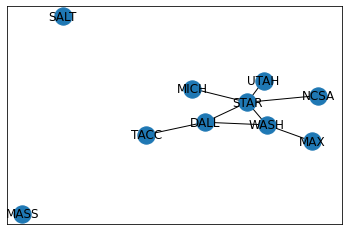

In [3]:
try:
    available_resources = fablib.get_available_resources()
    print(f"Available Resources: {available_resources}")
    available_resources.draw()
except Exception as e:
    print(f"Error: {e}")
    traceback.print_exc()

## Create the Experiment Slice

#### Configure the Experiment Parameters



In [4]:
slice_name_base = 'MySlice'
#sites = [ 'UKY', 'RENC', 'LBNL' ]
sites = [ 'TACC', 'MAX', 'UTAH', 'NCSA', 'MICH', 'WASH', 'DALL', 'SALT']
#sites = [ 'LBNL' ]
node_name_base = 'node'
#image = 'default_centos_8'
image = 'default_ubuntu_20'
#image = 'default_rocky_8'
cores = 2
ram = 8
disk = 10

node_count=20

### Create Slice

<img src="./figs/SingleNode.png" width="20%"><br>

Create a single node with basic compute capabilities. The submit function will block until the node is ready and will display a progress bar.


In [5]:
for site in sites:
    try:
        slice_name=f"{slice_name_base}_{site}"
        print(f"Creating slice {slice_name} at {site}")
        #Create Slice
        slice = fablib.new_slice(slice_name)

        for node_num in range(node_count):
            node_name = f"{node_name_base}{node_num}"
            # Add node
            node = slice.add_node(name=node_name, site=site)
            node.set_capacities(cores=cores, ram=ram, disk=disk)
            node.set_image(image)

        #Submit Slice Request
        slice.submit(wait_progress=False)
    except Exception as e:
        print(f"Slice Failed: {e}")
        traceback.print_exc()
        
        

Creating slice MySlice_TACC at TACC
Creating slice MySlice_MAX at MAX
Creating slice MySlice_UTAH at UTAH
Creating slice MySlice_NCSA at NCSA
Creating slice MySlice_MICH at MICH
Creating slice MySlice_WASH at WASH
Creating slice MySlice_DALL at DALL
Creating slice MySlice_SALT at SALT


In [6]:
for site in sites:
    try:
        slice_name=f"{slice_name_base}_{site}"
        print(f"Waiting for slice {slice_name} at {site}")

        #Get Slice
        slice = fablib.get_slice(slice_name)

        slice.wait_ssh(progress=True)
        #Submit 
        #slice.submit(wait_progress=False)
        #slice.post_boot_config(verbose=True)
    except Exception as e:
        print(f"Slice Failed: {e}")
        traceback.print_exc()

Waiting for slice MySlice_TACC at TACC
Waiting for slice . Slice state: StableOK
Waiting for ssh in slice .. ssh successful
Waiting for slice MySlice_MAX at MAX
Waiting for slice . Slice state: StableOK
Waiting for ssh in slice . ssh successful
Waiting for slice MySlice_UTAH at UTAH
Waiting for slice . Slice state: StableOK
Waiting for ssh in slice . ssh successful
Waiting for slice MySlice_NCSA at NCSA
Waiting for slice . Slice state: StableOK
Waiting for ssh in slice . ssh successful
Waiting for slice MySlice_MICH at MICH
Waiting for slice . Slice state: StableOK
Waiting for ssh in slice . ssh successful
Waiting for slice MySlice_WASH at WASH
Waiting for slice . Slice state: StableOK
Waiting for ssh in slice . ssh successful
Waiting for slice MySlice_DALL at DALL
Waiting for slice . Slice state: StableOK
Waiting for ssh in slice . ssh successful
Waiting for slice MySlice_SALT at SALT
Waiting for slice . Slice state: StableOK
Waiting for ssh in slice . ssh successful


In [7]:
for site in sites:
    try:
        slice_name=f"{slice_name_base}_{site}"
        print(f"Waiting for slice {slice_name} at {site}")

        #Get Slice
        slice = fablib.get_slice(slice_name)

        #slice.wait_ssh(progress=True)
        #Submit 
        #slice.submit(wait_progress=False)
        slice.post_boot_config(verbose=True)
    except Exception as e:
        print(f"Slice Failed: {e}")
        traceback.print_exc()

Waiting for slice MySlice_TACC at TACC
post_boot_config
build_interface_map
Node data node0
{}
Node data node1
{}
Node data node2
{}
Node data node3
{}
Node data node4
{}
Node data node5
{}
Node data node6
{}
Node data node7
{}
Node data node8
{}
Node data node9
{}
Node data node10
{}
Node data node11
{}
Node data node12
{}
Node data node13
{}
Node data node14
{}
Node data node15
{}
Node data node16
{}
Node data node17
{}
Node data node18
{}
Node data node19
{}
Waiting for slice MySlice_MAX at MAX
post_boot_config
build_interface_map
Node data node0
{}
Node data node1
{}
Node data node2
{}
Node data node3
{}
Node data node4
{}
Node data node5
{}
Node data node6
{}
Node data node7
{}
Node data node8
{}
Node data node9
{}
Node data node10
{}
Node data node11
{}
Node data node12
{}
Node data node13
{}
Node data node14
{}
Node data node15
{}
Node data node16
{}
Node data node17
{}
Node data node18
{}
Node data node19
{}
Waiting for slice MySlice_UTAH at UTAH
post_boot_config
build_interfac

In [ ]:
for site in sites:
    try:
        slice_name=f"{slice_name_base}_{site}"
        print(f"Waiting for slice {slice_name} at {site}")

        #Get Slice
        slice = fablib.get_slice(slice_name)

        #slice.wait_ssh(progress=True)
        #Submit 
        #slice.submit(wait_progress=False)
        slice.post_boot_config(verbose=True)
    except Exception as e:
        print(f"Slice Failed: {e}")
        traceback.print_exc()

### Get the New Slice

Your new slice is in the list of all your slices. You can get the specific slice using the fablib library.

In [ ]:
for site in sites:
    try:
        slice_name=f"{slice_name_base}_{site}"
        print(f"Getting {slice_name} slice at {site}")
        
        slice = fablib.get_slice(slice_name)
        print(f"Slice: {slice.get_name()}, {slice.get_state()}")
    except Exception as e:
        print(f"Get Slices Fail: {e}")

### Print the Node's Attributes

Each node in the slice has a set of get functions that return the node's attributes.

In [ ]:
for site in sites:
    try:
        slice_name=f"{slice_name_base}_{site}"

        print(f"Get attributes for {slice_name} at {site}")    
        slice = fablib.get_slice(slice_name)
        for node in slice.get_nodes():
            print("Node:")
            print(f"   Name              : {node.get_name()}")
            print(f"   Cores             : {node.get_cores()}")
            print(f"   RAM               : {node.get_ram()}")
            print(f"   Disk              : {node.get_disk()}")
            print(f"   Image             : {node.get_image()}")
            print(f"   Image Type        : {node.get_image_type()}")
            print(f"   Host              : {node.get_host()}")
            print(f"   Site              : {node.get_site()}")
            print(f"   Management IP     : {node.get_management_ip()}")
            print(f"   Reservation ID    : {node.get_reservation_id()}")
            print(f"   Reservation State : {node.get_reservation_state()}")
            print(f"   Components        : {node.get_components()}")
            print(f"   Interfaces        : {node.get_interfaces()}")
            print(f"   SSH Command       : {node.get_ssh_command()}")
            print()    
    except Exception as e:
        print(f"Fail: {e}")

## Accessing the VM

#### Terminal SSH Command

You can access the nodes in you experiments using ssh. In order to increase security, FABRIC requires all ssh connections to jump through one of the FABRIC bastion hosts. The bastion host IPs and your bastion keys should have been set at the top of this notebook. 

The ssh command required to access your node from this Jupyter instance can be found using the following library call.  Note that using this command from a different computer, such as your laptop, may require you to copy ssh keys to that computer and use different paths to the keys. 


In [ ]:
for site in sites:
    try:
        slice_name=f"{slice_name_base}_{site}"

        print(f"Getting ssh command for {slice_name} at {site}")    
        slice = fablib.get_slice(slice_name)
        for node in slice.get_nodes():
            print(f"   Name              : {node.get_name()}")
            print(f"   SSH Command       : {node.get_ssh_command()}")
            print()    
    except Exception as e:
        print(f"Fail: {e}")

#### SSH with fablib

Most experiments will require automated configuration and execution. You can use the fablib library to execute arbitrary commands on your node. 

The following code demonstrates how to use fablib to execute a "Hello, FABRIC" bash script. The library uses the bastion and VM keys defined at the top of this notebook to jump through the bastion host and execute the script.

In [ ]:
command= 'echo Hello, FABRIC from node `hostname -s`'

In [ ]:
for site in sites:
    try:
        slice_name=f"{slice_name_base}_{site}"

        print(f"Executing command for {slice_name} at {site}")    
        slice = fablib.get_slice(slice_name)
        for node in slice.get_nodes():
            stdout, stderr = node.execute(command)
            print(stdout)
    except Exception as e:
        print(f"Fail: {e}")

## Delete Slice

Please delete your slicd when you are done with your experiment.

In [ ]:
for site in sites:
    try:
        slice_name=f"{slice_name_base}_{site}"

        print(f"Deleting for {slice_name} at {site}")    
        slice = fablib.get_slice(slice_name)
        slice.delete()
    except Exception as e:
        print(f"Fail: {e}")